In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Minpro/Train21.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4.0,2,177,3,low,F,44.0,1233,1
1,2,F,Flight,4.0,5,216,2,low,M,59.0,3088,1
2,3,A,Flight,2.0,2,183,4,low,M,48.0,3374,1
3,4,B,Flight,3.0,3,176,4,medium,M,10.0,1177,1
4,5,C,Flight,2.0,2,184,3,medium,F,46.0,2484,1


In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4.0,2,177,3,low,F,44.0,1233,1
1,2,F,Flight,4.0,5,216,2,low,M,59.0,3088,1
2,3,A,Flight,2.0,2,183,4,low,M,48.0,3374,1
3,4,B,Flight,3.0,3,176,4,medium,M,10.0,1177,1
4,5,C,Flight,2.0,2,184,3,medium,F,46.0,2484,1


#Audit Data

In [5]:
#Cek missing values
df.isnull().sum()

ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls     22
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance       0
Gender                   0
Discount_offered       100
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64

In [6]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
#Cek duplikat rows
df.duplicated().sum()

6

In [8]:
#Cek inkonsisten data
print(df.Gender.unique())

['F' 'M' 'Male' 'Female']


In [10]:
#Cek noise
print(df.Warehouse_block.unique())
print(df.Cost_of_the_Product.unique())

['D' 'F' 'A' 'B' 'C' 'ZX']
[     177      216      183      176      184      162      250      233
      150      164      189      232      198      275      152      227
      143      239      145      161      156      211      251      225
      172      234      266      257      223      149      137      181
      215      269      139      174      151      210      169      160
      190      141      165      170      203      246      238      193
      221      179      105      261      202      109      158      231
      206      187      230      113      180      132      217      197
      185      278      229      186      286      175      219      213
      235      271      144      218      263      168      265      205
      252      222      220      147      200      224      247      280
      157      207      237      264      248      191      146      135
       98       97      114      112      274      166      148      270
      242      192      

In [11]:
print(df['Reached.on.Time_Y.N'].unique())

[1 0 3]


In [12]:
#Noise Warehouse
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
11000,10995,A,Ship,4.0,1,10000000,5,medium,F,1.0,1538,1
11001,10996,B,Ship,4.0,1,10000000,5,medium,F,6.0,1247,0
11002,10997,C,Ship,5.0,4,10000000,5,low,F,4.0,1155,0
11003,10998,F,Ship,5.0,2,10000000,6,medium,M,2.0,1210,0
11004,10999,D,Ship,2.0,5,10000000,5,low,F,6.0,1639,0


In [13]:
df.iloc[8766:8771]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8766,8761,ZX,Road,4.0,3,187,6,low,F,9.0,5872,0
8767,8762,ZX,Road,3.0,4,136,3,medium,M,6.0,4631,0
8768,8763,ZX,Road,3.0,4,232,5,medium,M,9.0,5759,0
8769,8764,ZX,Flight,3.0,2,257,2,low,F,9.0,5085,1
8770,8765,ZX,Flight,4.0,1,156,2,medium,M,4.0,5225,0


In [14]:
#Noise Cost of the product
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
11000,10995,A,Ship,4.0,1,10000000,5,medium,F,1.0,1538,1
11001,10996,B,Ship,4.0,1,10000000,5,medium,F,6.0,1247,0
11002,10997,C,Ship,5.0,4,10000000,5,low,F,4.0,1155,0
11003,10998,F,Ship,5.0,2,10000000,6,medium,M,2.0,1210,0
11004,10999,D,Ship,2.0,5,10000000,5,low,F,6.0,1639,0


In [15]:
#Noise Reached on time yN
df.iloc[8257:8262, :]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8257,8252,F,Ship,5.0,3,226,2,high,F,6.0,5033,3
8258,8253,A,Ship,5.0,2,158,3,low,M,4.0,4324,3
8259,8254,B,Ship,3.0,2,274,2,high,M,2.0,5029,3
8260,8255,C,Ship,3.0,4,245,3,medium,F,7.0,5429,3
8261,8256,F,Ship,5.0,3,254,6,low,M,8.0,1932,3


In [16]:
df.iloc[8288:8290, :]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8288,8283,A,Ship,3.0,1,155,3,medium,F,7.0,5709,3
8289,8284,B,Ship,2.0,5,142,3,high,M,10.0,5174,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcc1c26890>,
      dtype=object)

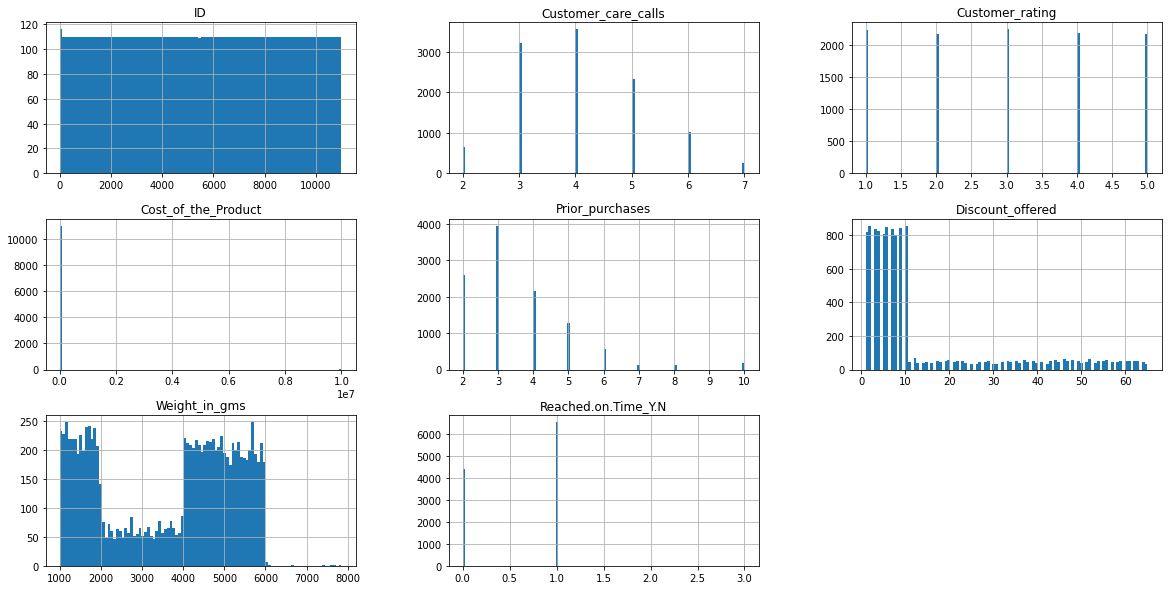

In [17]:
#Cek outlier
df.hist(bins=100, figsize=(20,10))

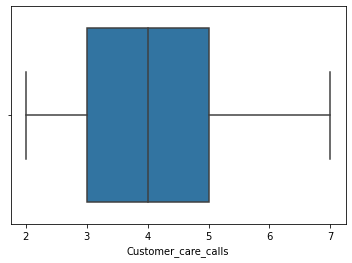

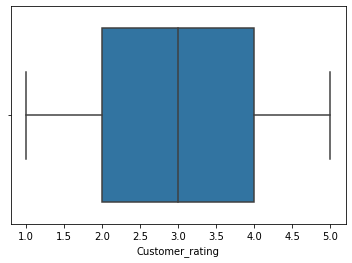

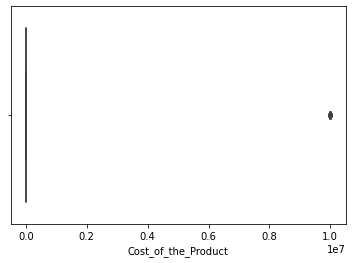

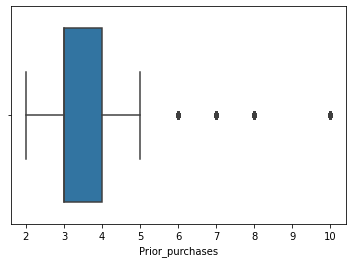

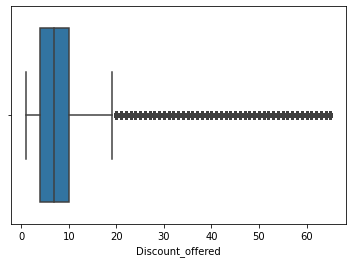

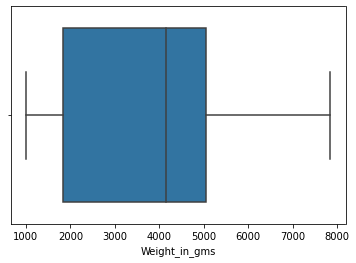

In [18]:
for col in ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases', 'Discount_offered', 'Weight_in_gms']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

#Data Eksplorasi

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11005 entries, 0 to 11004
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11005 non-null  int64  
 1   Warehouse_block      11005 non-null  object 
 2   Mode_of_Shipment     11005 non-null  object 
 3   Customer_care_calls  10983 non-null  float64
 4   Customer_rating      11005 non-null  int64  
 5   Cost_of_the_Product  11005 non-null  int64  
 6   Prior_purchases      11005 non-null  int64  
 7   Product_importance   11005 non-null  object 
 8   Gender               11005 non-null  object 
 9   Discount_offered     10905 non-null  float64
 10  Weight_in_gms        11005 non-null  int64  
 11  Reached.on.Time_Y.N  11005 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


In [20]:
df.nunique()

ID                     10999
Warehouse_block            6
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      216
Prior_purchases            8
Product_importance         3
Gender                     4
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        3
dtype: int64

In [21]:
df.shape

(11005, 12)

In [22]:
df.size

132060

In [23]:
#Unique values

In [24]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,11005.000000,10983.000000,11005.000000,1.100500e+04,11005.000000,10905.000000,11005.000000,11005.000000
mean,5497.036801,4.052354,2.991095,9.296761e+03,3.567015,13.205777,3633.337937,0.598819
std,3176.951036,1.140826,1.413607,3.013132e+05,1.522694,16.084945,1635.315267,0.494038
min,1.000000,2.000000,1.000000,9.600000e+01,2.000000,1.000000,1001.000000,0.000000
25%,2746.000000,3.000000,2.000000,1.690000e+02,3.000000,4.000000,1839.000000,0.000000
50%,5497.000000,4.000000,3.000000,2.140000e+02,3.000000,7.000000,4148.000000,1.000000
75%,8248.000000,5.000000,4.000000,2.510000e+02,4.000000,10.000000,5049.000000,1.000000
max,10999.000000,7.000000,5.000000,1.000000e+07,10.000000,65.000000,7846.000000,3.000000


In [25]:
df.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,11005,11005,11005,11005
unique,6,3,3,4
top,F,Ship,low,F
freq,3661,7468,5297,5546


#Data Preparation

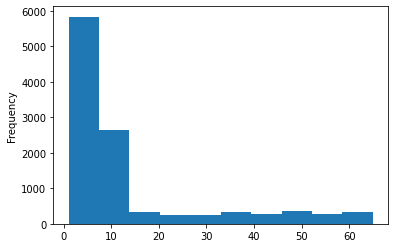

In [26]:
#Handling Missing Value, sebaran normal difill pake Mean, skew pake median
df['Discount_offered'].plot.hist()

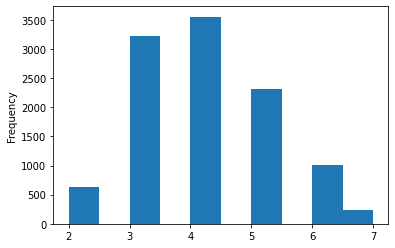

In [27]:
df['Customer_care_calls'].plot.hist()

In [28]:
#Handling cust care calls
df['Customer_care_calls']= df['Customer_care_calls'].fillna(df['Customer_care_calls'].mean())

In [30]:
print(df.Customer_care_calls.unique())

[4.         2.         3.         5.         6.         7.
 4.05235364]


In [31]:
#Handling discount
df['Discount_offered'] = df['Discount_offered'].fillna(df['Discount_offered'].median())

In [32]:
print(df.Discount_offered.unique())

[44. 59. 48. 10. 46. 12.  3. 11. 29. 32.  1. 43. 45.  6. 36. 18. 38. 51.
  2. 28. 24. 31. 61. 22.  4. 62. 16. 56. 15.  9. 40. 37. 41. 17. 64. 52.
 49. 39. 14. 33. 21. 13. 23. 26. 57.  7. 35.  8.  5. 53. 55. 47. 65. 25.
 50. 60. 20. 19. 63. 58. 34. 54. 27. 30. 42.]


In [33]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [34]:
#Handling duplicat
df.drop([21,22,23,112,113,114],axis=0,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [37]:
#Inkonsistensi
df['Gender'] = df['Gender'].replace(['F','M'],['Female','Male'])

In [ ]:
print(df.Gender.unique())

['Female' 'Male']


In [38]:
#Data type
df['Customer_care_calls'] = df['Customer_care_calls'].astype('int')

In [39]:
#Noise
df['Warehouse_block']= df['Warehouse_block'].replace(['F'], 'E')

In [40]:
df.drop([8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8776, 8777, 8778, 8779,8780], axis=0, inplace=True)

In [41]:
print(df.Warehouse_block.unique())

['D' 'E' 'A' 'B' 'C']


In [42]:
#noise cost of the product
df.drop([10995, 10996, 10997, 10998, 10999, 11000, 11001, 11002, 11003, 11004], axis=0, inplace=True) #cost_of_prouct

In [43]:
df[df['Reached.on.Time_Y.N']== 3]['Reached.on.Time_Y.N'].count()

7

In [44]:
df.drop([8257, 8258, 8259, 8260, 8261, 8288, 8289], axis=0, inplace=True)
print(df['Reached.on.Time_Y.N'].unique())

[1 0]


In [45]:
#Rename column
df.rename(columns=str.lower, inplace=True)

In [46]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,D,Flight,4,2,177,3,low,Female,44.0,1233,1
1,2,E,Flight,4,5,216,2,low,Male,59.0,3088,1
2,3,A,Flight,2,2,183,4,low,Male,48.0,3374,1
3,4,B,Flight,3,3,176,4,medium,Male,10.0,1177,1
4,5,C,Flight,2,2,184,3,medium,Female,46.0,2484,1


#Modeling

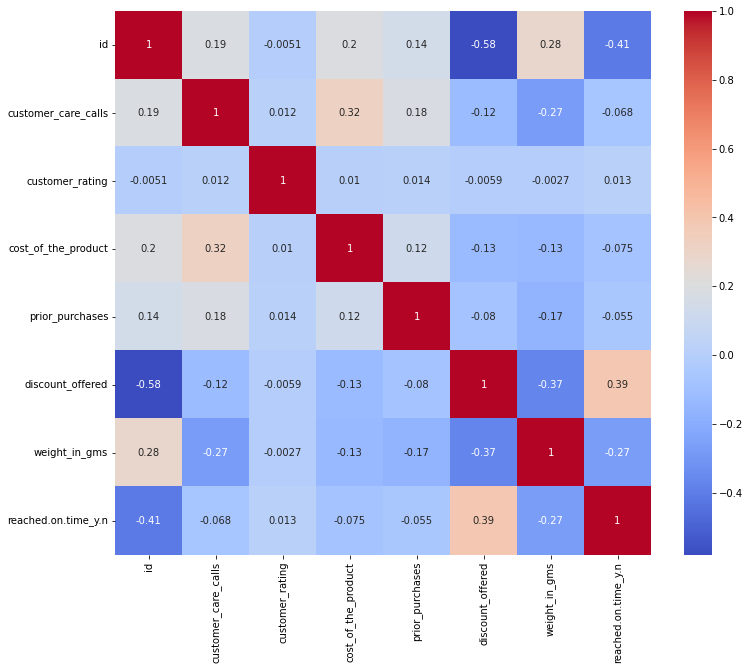

In [47]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [48]:
korelasi=df.corr()
korelasi

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n
id,1.000000,0.188746,-0.005083,0.197319,0.144365,-0.580580,0.279935,-0.410677
customer_care_calls,0.188746,1.000000,0.012403,0.321535,0.179945,-0.118292,-0.274653,-0.067943
customer_rating,-0.005083,0.012403,1.000000,0.010006,0.013559,-0.005934,-0.002721,0.013313
cost_of_the_product,0.197319,0.321535,0.010006,1.000000,0.123503,-0.128020,-0.131937,-0.074708
prior_purchases,0.144365,0.179945,0.013559,0.123503,1.000000,-0.080102,-0.166833,-0.054715
discount_offered,-0.580580,-0.118292,-0.005934,-0.128020,-0.080102,1.000000,-0.368010,0.389375
weight_in_gms,0.279935,-0.274653,-0.002721,-0.131937,-0.166833,-0.368010,1.000000,-0.269520
reached.on.time_y.n,-0.410677,-0.067943,0.013313,-0.074708,-0.054715,0.389375,-0.269520,1.000000


In [51]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,D,Flight,4,2,177,3,low,Female,44.0,1233,1
1,2,E,Flight,4,5,216,2,low,Male,59.0,3088,1
2,3,A,Flight,2,2,183,4,low,Male,48.0,3374,1
3,4,B,Flight,3,3,176,4,medium,Male,10.0,1177,1
4,5,C,Flight,2,2,184,3,medium,Female,46.0,2484,1


#EDA


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


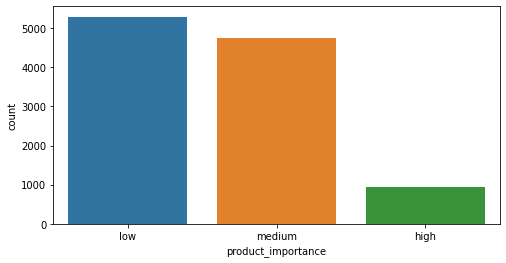

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


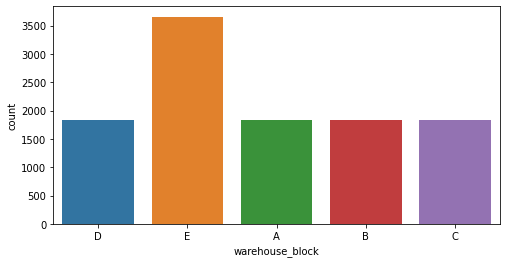

In [52]:
#1. Menghitung jumlah 
for col in ['product_importance','warehouse_block']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


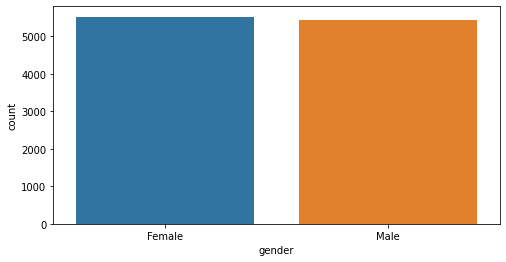

In [53]:
for col in ['gender']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

In [54]:
df['gender'].value_counts()

Female    5528
Male      5439
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


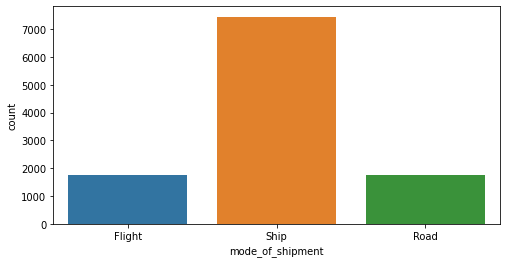

In [55]:
for col in ['mode_of_shipment']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

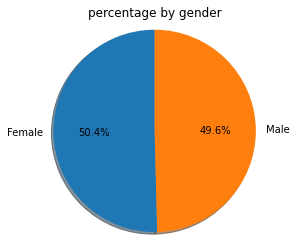

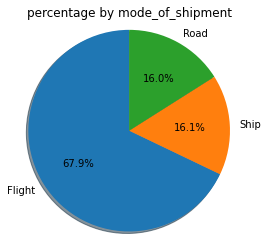

In [56]:
for col in ['gender', 'mode_of_shipment']:
  plt.figure(figsize=(4,4))
  plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
  plt.axis('equal')
  plt.title(f'percentage by {col}')

  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


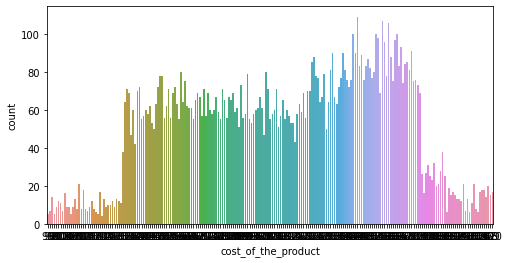

In [57]:
for col in ['cost_of_the_product']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


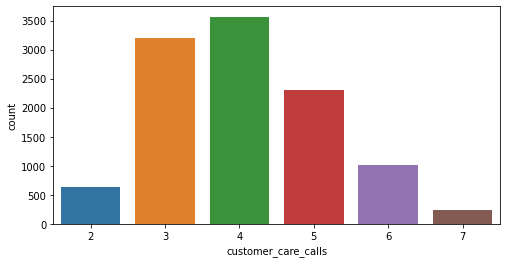

In [58]:
for col in ['customer_care_calls']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


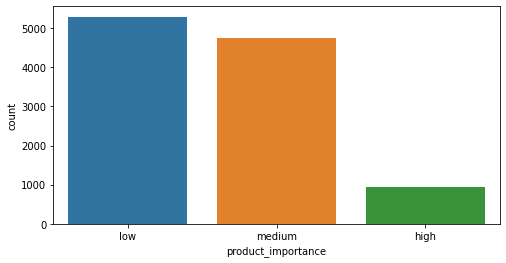

In [59]:
for col in ['product_importance']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

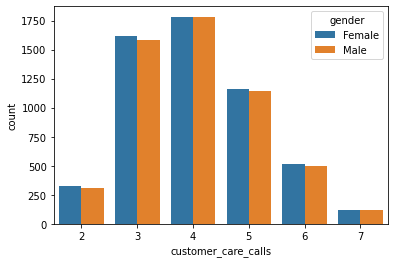

In [60]:
sns.countplot(x = 'customer_care_calls', hue = 'gender', data = df)

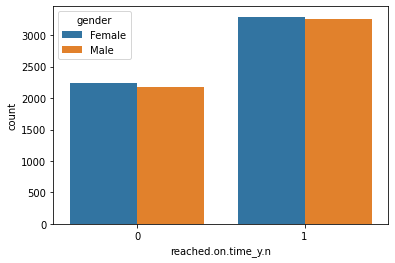

In [61]:
sns.countplot(x = 'reached.on.time_y.n', hue = 'gender', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


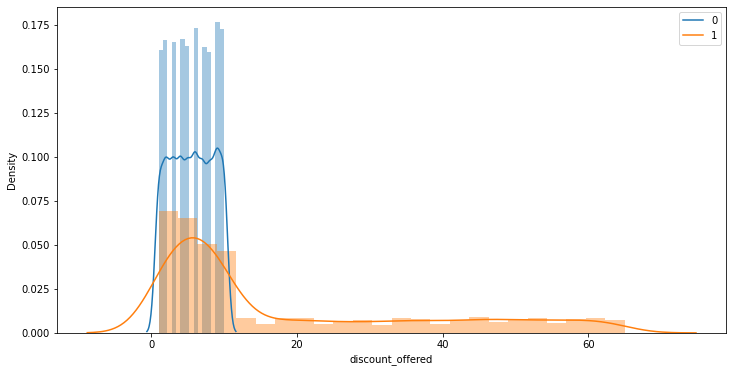

In [64]:
for col in ['discount_offered' ]:
    plt.figure(figsize=(12,6))
    sns.distplot(df[col][df['reached.on.time_y.n']==0])
    sns.distplot(df[col][df['reached.on.time_y.n']==1])
    plt.legend(['0','1'])
    plt.show()

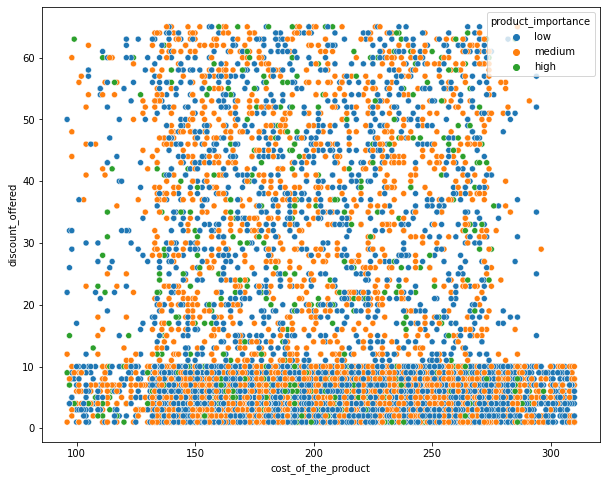

In [65]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='cost_of_the_product', y='discount_offered',hue='product_importance',data=df)
#plt.show()

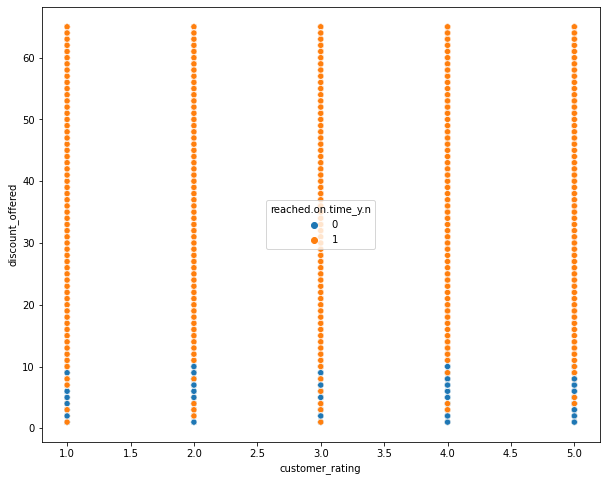

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='customer_rating', y='discount_offered',hue='reached.on.time_y.n',data=df)
#plt.show()

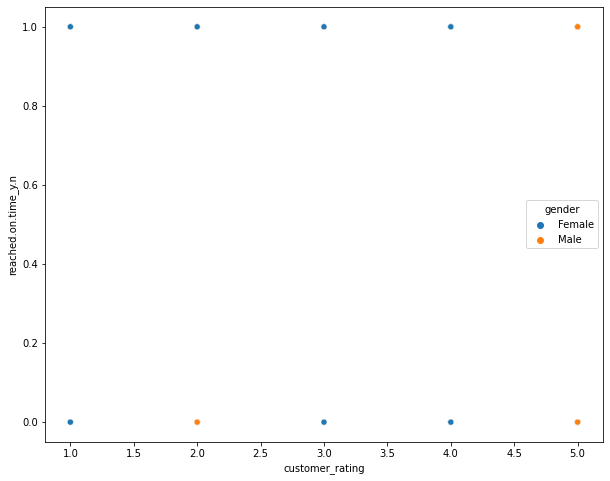

In [67]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='customer_rating', y='reached.on.time_y.n',hue='gender',data=df)
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


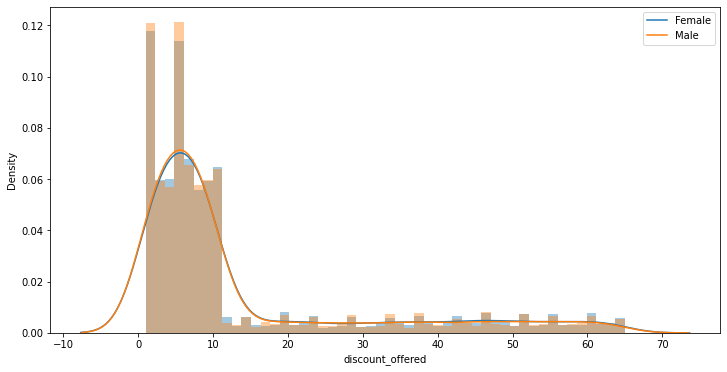

In [68]:
for col in ['discount_offered' ]:
    plt.figure(figsize=(12,6))
    sns.distplot(df[col][df['gender']=='Female'])
    sns.distplot(df[col][df['gender']=='Male'])
    plt.legend(['Female','Male'])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

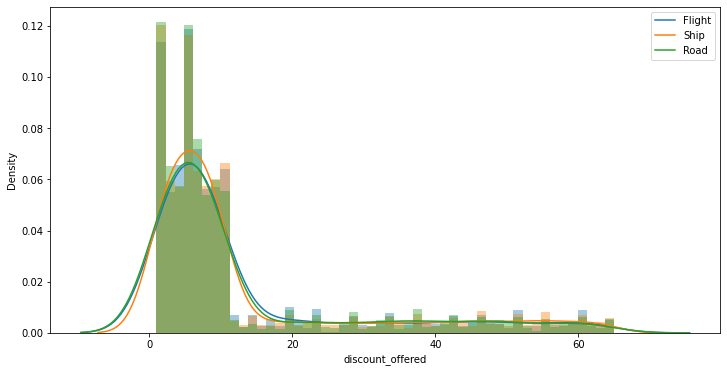

In [69]:
for col in ['discount_offered' ]:
    plt.figure(figsize=(12,6))
    sns.distplot(df[col][df['mode_of_shipment']=='Flight'])
    sns.distplot(df[col][df['mode_of_shipment']=='Ship'])
    sns.distplot(df[col][df['mode_of_shipment']=='Road'])
    plt.legend(['Flight','Ship', 'Road'])
    plt.show()

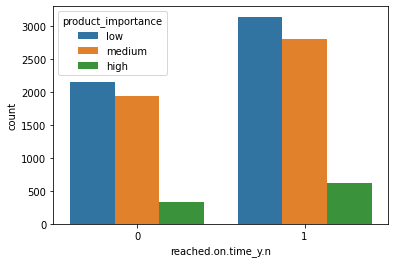

In [70]:
sns.countplot(x = 'reached.on.time_y.n', hue = 'product_importance', data = df)

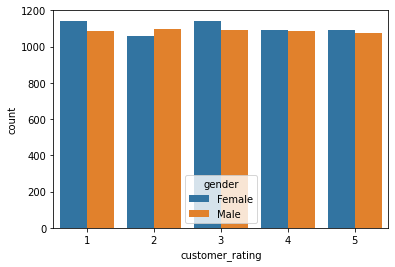

In [71]:
sns.countplot(x = 'customer_rating', hue = 'gender', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


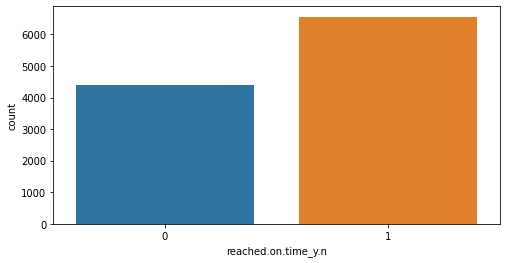

In [72]:
for col in ['reached.on.time_y.n']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

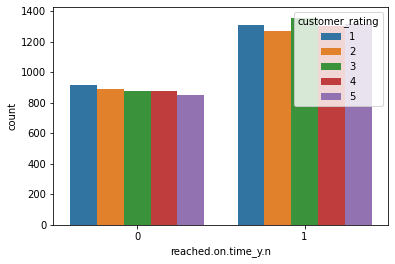

In [73]:
sns.countplot(x = 'reached.on.time_y.n', hue = 'customer_rating', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


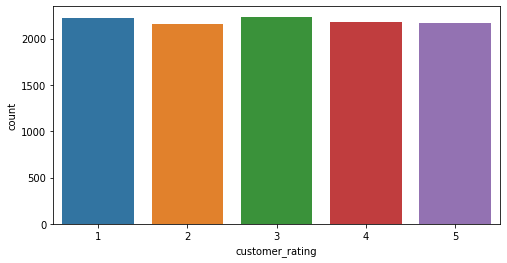

In [74]:
for col in ['customer_rating']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

In [75]:
df['customer_rating'].value_counts()

3    2235
1    2227
4    2181
5    2166
2    2158
Name: customer_rating, dtype: int64

(array([ 636.,    0., 3206.,    0., 3566.,    0., 2306.,    0., 1009.,
         244.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Patch objects>)

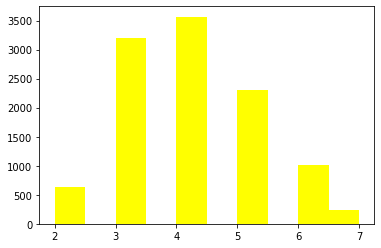

In [76]:
plt.hist(df['customer_care_calls'], color='yellow')

(array([5919., 2644.,  327.,  252.,  251.,  334.,  271.,  362.,  280.,
         327.]),
 array([ 1. ,  7.4, 13.8, 20.2, 26.6, 33. , 39.4, 45.8, 52.2, 58.6, 65. ]),
 <a list of 10 Patch objects>)

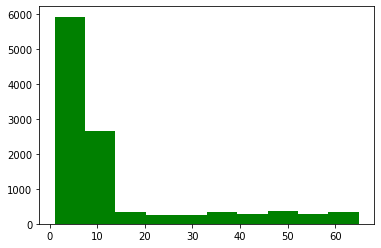

In [77]:
plt.hist(df['discount_offered'], color='green')

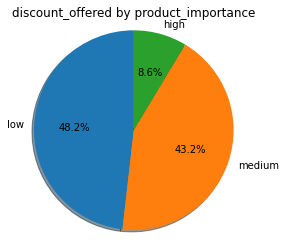

In [78]:
#pie chart
for col in ['product_importance']:
  plt.figure(figsize=(4,4))
  plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%',
          shadow=True, startangle=90)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(f'discount_offered by {col}')

  #plt.show()
  plt.savefig('gambarpie')


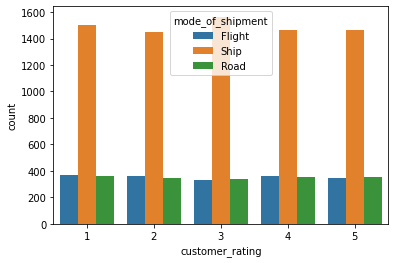

In [79]:
#categorical vs categorical
sns.countplot(x = 'customer_rating', hue = 'mode_of_shipment', data = df)

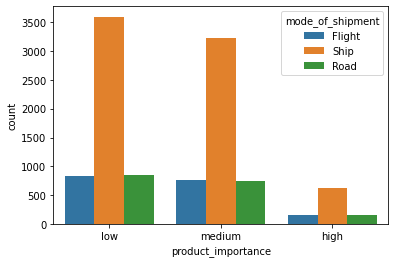

In [80]:
sns.countplot(x = 'product_importance', hue = 'mode_of_shipment', data = df)

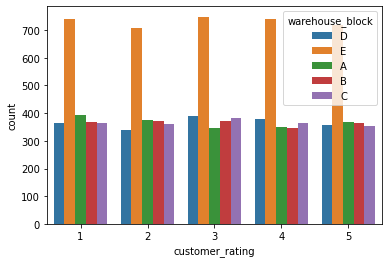

In [81]:
sns.countplot(x = 'customer_rating', hue = 'warehouse_block', data = df)

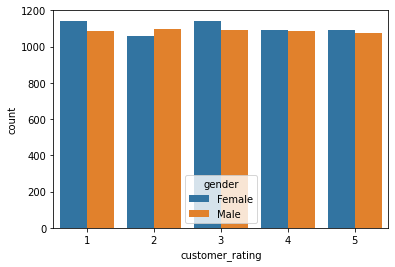

In [82]:
sns.countplot(x = 'customer_rating', hue = 'gender', data = df)

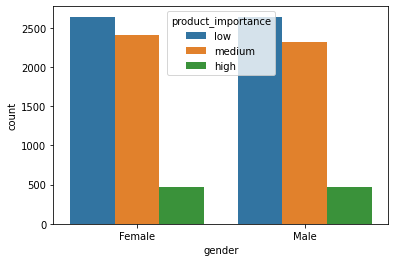

In [83]:
sns.countplot(x = 'gender', hue = 'product_importance', data = df)

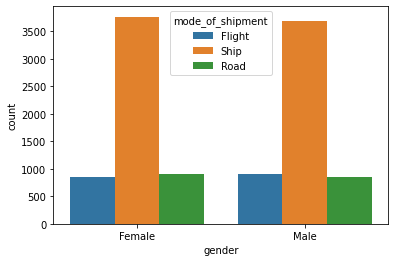

In [84]:
sns.countplot(x = 'gender', hue = 'mode_of_shipment', data = df)

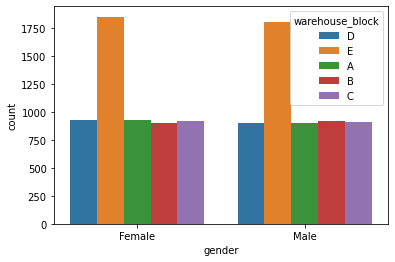

In [85]:
sns.countplot(x = 'gender', hue = 'warehouse_block', data = df)

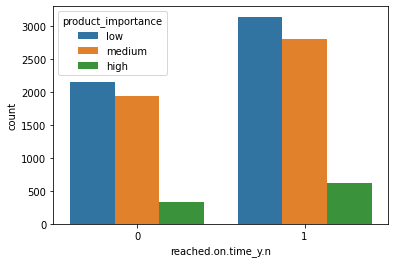

In [86]:
sns.countplot(x = 'reached.on.time_y.n', hue = 'product_importance', data = df)

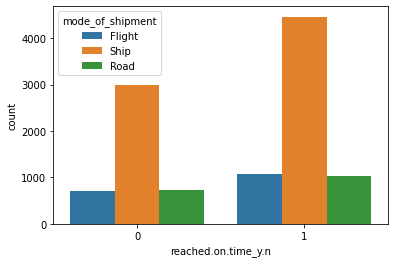

In [87]:
sns.countplot(x = 'reached.on.time_y.n', hue = 'mode_of_shipment', data = df)

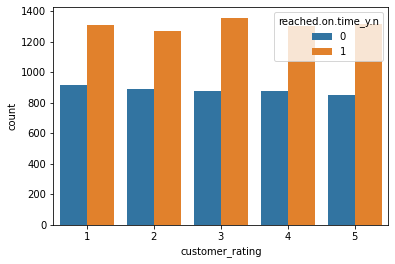

In [88]:
sns.countplot(x = 'customer_rating', hue = 'reached.on.time_y.n', data = df)

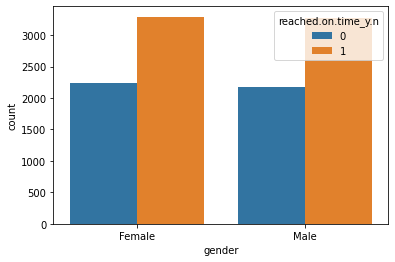

In [89]:
sns.countplot(x = 'gender', hue = 'reached.on.time_y.n', data = df)

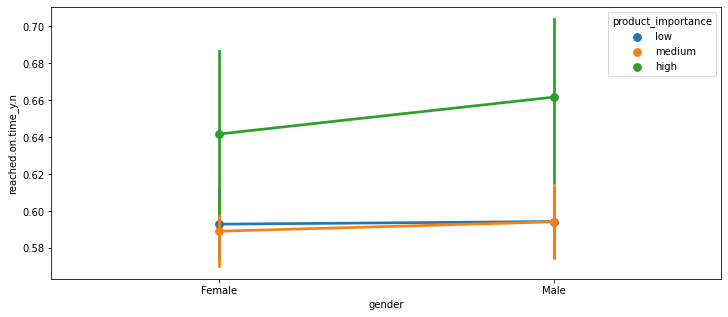

In [90]:
#objektif
plt.figure(figsize=(12,5))
sns.pointplot(x='gender', y='reached.on.time_y.n',hue='product_importance',data=df)
plt.show()